# PyTimber Tutorial
<hr style="border-top-width: 4px; border-top-color: #34609b;">

Accessing the CERN logging database and extracting machine parameters.

In [1]:
import pytimber
import time

In [2]:
db = pytimber.LoggingDB()

## Search for parameters

Use the wildcard %

In [3]:
db.search("%BEAM_INTENSITY%")

[u'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY',
 u'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY_ADC24BIT',
 u'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY',
 u'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY_ADC24BIT',
 u'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY',
 u'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY_ADC24BIT',
 u'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY',
 u'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY_ADC24BIT',
 u'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY',
 u'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY_LOBW',
 u'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY',
 u'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY_LOBW',
 u'LHC.BCTFR.B6R4.B1.DEV:BEAM_INTENSITY_HBW',
 u'LHC.BCTFR.B6R4.B1.DEV:BEAM_INTENSITY_LBW',
 u'LHC.BCTFR.B6R4.B1:BEAM_INTENSITY',
 u'LHC.BCTFR.B6R4.B1:BEAM_INTENSITY_LOBW',
 u'LHC.BCTFR.B6R4.B2.DEV:BEAM_INTENSITY_HBW',
 u'LHC.BCTFR.B6R4.B2.DEV:BEAM_INTENSITY_LBW',
 u'LHC.BCTFR.B6R4.B2:BEAM_INTENSITY',
 u'LHC.BCTFR.B6R4.B2:BEAM_INTENSITY_LOBW',
 u'LHC.BWCM.B1:BEAM_INTENSITY',
 u'LHC.BWCM.B2:BEAM_INTENSITY']

## Explore the parameter tree

use the ipython autocomplete (TAB) to explorer the parameter tree interactively

In [4]:
db.tree.LHC.Beam_Quality.Beam_1.get_vars()

[u'LHC.BQM.B1:ADC_AQUISITION_MAX',
 u'LHC.BQM.B1:ADC_AQUISITION_MIN',
 u'LHC.BQM.B1:ADC_WAVEFORM',
 u'LHC.BQM.B1:ATTENUATION',
 u'LHC.BQM.B1:BUNCH_INTENSITIES',
 u'LHC.BQM.B1:BUNCH_INTENSITY_MAX',
 u'LHC.BQM.B1:BUNCH_INTENSITY_MEAN',
 u'LHC.BQM.B1:BUNCH_INTENSITY_MIN',
 u'LHC.BQM.B1:BUNCH_INTENSITY_STDDEV',
 u'LHC.BQM.B1:BUNCH_LENGTHS',
 u'LHC.BQM.B1:BUNCH_LENGTH_MAX',
 u'LHC.BQM.B1:BUNCH_LENGTH_MEAN',
 u'LHC.BQM.B1:BUNCH_LENGTH_MIN',
 u'LHC.BQM.B1:BUNCH_LENGTH_STDDEV',
 u'LHC.BQM.B1:BUNCH_MEANS',
 u'LHC.BQM.B1:BUNCH_PEAKS',
 u'LHC.BQM.B1:BUNCH_PEAK_MAX',
 u'LHC.BQM.B1:BUNCH_PEAK_MEAN',
 u'LHC.BQM.B1:BUNCH_PEAK_MIN',
 u'LHC.BQM.B1:BUNCH_PEAK_STDDEV',
 u'LHC.BQM.B1:FILLED_BUCKETS',
 u'LHC.BQM.B1:NO_BUNCHES']

## Get Data

Specify a variable name and a timestamp or an interval. Data is always returned as a dictionary of timestamp, values arrays.


In [5]:
db.get("HX:FILLN",time.time())

{u'HX:FILLN': (array([  1.47030292e+09]), array([ 5162.]))}

## Timestamps

Timestamps can be give as floating point number, strings, datatime objects.

If only one timestamp is given the last value logged prior to the timestamp is given.

If the second argument is 'next' the first value logged after the timestamp is given.

If two timestamps are given the values logged in between (inclusively) are given.

Timestamp are returned as unix timestamp (seconds and fraction from 1970-01-01 00:00:00 GMT) or optionally as datetime object.

In [6]:
now=time.time()
"The unixtime `%.3f` correspond to `%s` local time."%(now,pytimber.dumpdate(now))

'The unixtime `1470312458.631` correspond to `2016-08-04 14:07:38.630` local time.'

In [7]:
db.get("HX:FILLN",time.time())

{u'HX:FILLN': (array([  1.47030292e+09]), array([ 5162.]))}

In [8]:
db.get("HX:FILLN",'2016-08-03 16:30:00.000')

{u'HX:FILLN': (array([  1.47022719e+09]), array([ 5160.]))}

In [9]:
db.get("HX:FILLN",'2016-08-03 16:30:00.000',unixtime=False)

{u'HX:FILLN': (array([datetime.datetime(2016, 8, 3, 14, 26, 27, 234000)], dtype=object),
  array([ 5160.]))}

In [10]:
db.get("HX:FILLN",'2016-08-02 16:30:00.000','next')

{u'HX:FILLN': (array([  1.47015166e+09]), array([ 5156.]))}

In [11]:
db.get("HX:FILLN",'2016-08-02 16:30:00.000','2016-08-03 16:30:00.000')

{u'HX:FILLN': (array([  1.47015166e+09,   1.47019695e+09,   1.47019821e+09,
           1.47020552e+09,   1.47022719e+09]),
  array([ 5156.,  5157.,  5158.,  5159.,  5160.]))}

## Variables

Variables can be given as a string, as a pattern, as a list of strings.

In [12]:
db.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY",now)

{u'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY': (array([  1.47031243e+09]),
  array([  2.23163498e+14]))}

In [13]:
db.get("LHC.BCTDC.A6R4.B%:BEAM_INTENSITY",now)

{u'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY': (array([  1.47031243e+09]),
  array([  2.23163498e+14])),
 u'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY': (array([  1.47031243e+09]),
  array([  2.24444102e+14]))}

In [14]:
db.get(["LHC.BCTDC.A6R4.B1:BEAM_INTENSITY","LHC.BCTDC.A6R4.B2:BEAM_INTENSITY"],now)

{u'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY': (array([  1.47031243e+09]),
  array([  2.23163498e+14])),
 u'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY': (array([  1.47031243e+09]),
  array([  2.24444102e+14]))}

## Values

Values can be scalar (floating point values or string) or vectors. If in a query the length of the vectors is the same, as 2D array is returned, else a list of arrays is returned instead.

In [15]:
# prepare for plotting
%matplotlib notebook
import matplotlib.pyplot as pl

<IPython.core.display.Javascript object>


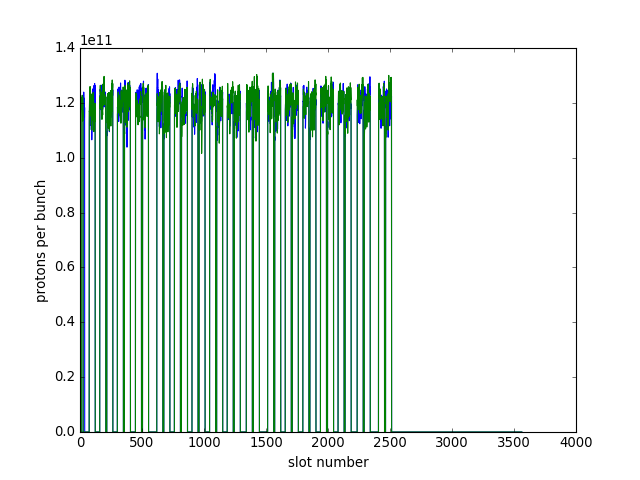

In [16]:
ts=pytimber.parsedate("2016-07-01 03:10:15.000")
ib1="LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY"
ib2="LHC.BCTFR.A6R4.B2:BUNCH_INTENSITY"
data=db.get([ib1,ib2],ts,'next')
timestamps,valuesb1=data[ib1]
timestamps,valuesb2=data[ib2]
pl.figure()
pl.plot(valuesb1[0])
pl.plot(valuesb2[0])
pl.xlabel("slot number")
pl.ylabel("protons per bunch")

In [17]:
ts=pytimber.parsedate("2016-07-01 03:10:15.000")
ib1="LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY"
ib2="LHC.BCTFR.A6R4.B2:BUNCH_INTENSITY"
data=db.get([ib1,ib2],ts,ts+60)
timestamps,valuesb1=data[ib1]
timestamps,valuesb2=data[ib2]

<IPython.core.display.Javascript object>


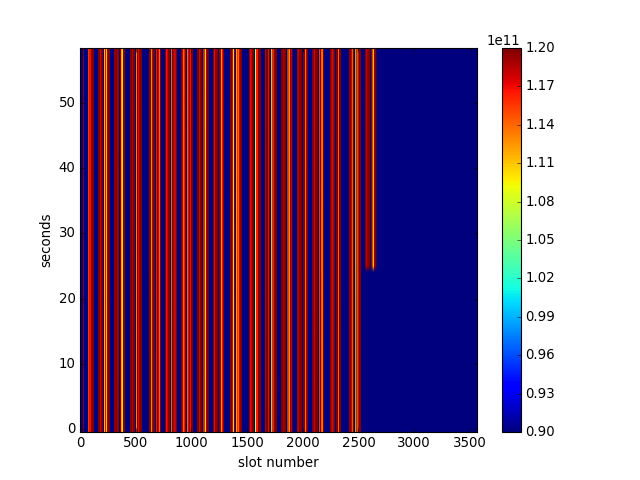

In [18]:
pl.figure()
pl.imshow(valuesb1,aspect='auto',origin='bottom')
pl.ylabel('seconds'); pl.xlabel("slot number")
pl.colorbar(); pl.clim(9e10,12e10)

<IPython.core.display.Javascript object>


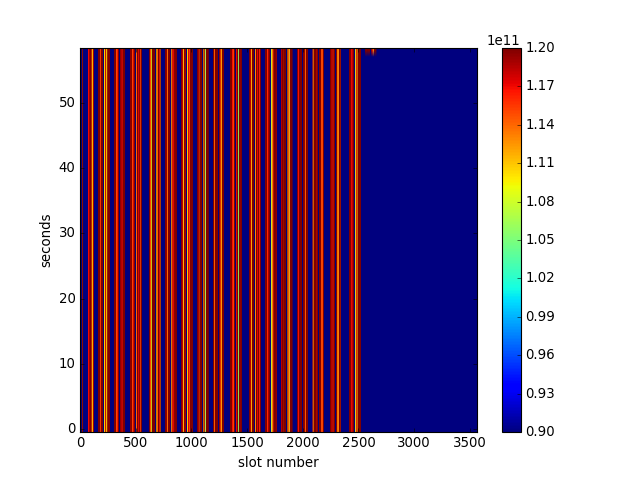

In [19]:
pl.figure()
pl.imshow(valuesb2,aspect='auto',origin='bottom')
pl.ylabel('seconds'); pl.xlabel("slot number")
pl.colorbar(); pl.clim(9e10,12e10)